<a href="https://colab.research.google.com/github/EllenSakkla/Python/blob/main/projects/Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a decision tree
---

The focus of this project is a **data set**, using the idea of a **decision tree class**.  The model is simplified with Python code to make a simple decision tree classification model.  This is done for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements.

This project involves coding a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as **Iris-virginica**, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not - the other two types being 'Iris-setosa' and 'Iris-versicolor').  Later, using this information, species can be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns


In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

iris_data
#iris_data.info() #can't run both display requests at the same time

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The initial review of the data set shows that we have 150 rows and 5 columns in total, 4 containing numerical values for sepal/petal width and length and the 5th containing the names of the species.

In [ ]:
#To view the first or last few records of a dataframe, we can use the methods head and tail
# first_ten = iris_data[:10]
# first_ten
# last_ten = iris_data[-10:]
# last_ten

iris_data.head() #displaying the top 5 rows of the dataframe

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#alternative
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print(iris_data)
column_values = iris_data[["species"]].values
# print(column_values) #will print the whole column 'species'

#Indentifying and printing the unique types of iris flowers found in the database
unique_values = np.unique(column_values)
print("The types of iris flower species found in the dataframe are:", unique_values)

     sepal-length  sepal-width  petal-length  petal-width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
The types of iris flower species found in the dataframe are: ['Iris-setosa' 'Iris-versic

In [ ]:
# Number of entries for each iris flower under the 'species' column
iris_data['species'].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
columns = iris_data[["sepal-length", "sepal-width", "petal-length", "petal-width", "species"]]
max_value = columns.max()
print(max_value)
min_value = columns.min()
print(min_value)

sepal-length               7.9
sepal-width                4.4
petal-length               6.9
petal-width                2.5
species         Iris-virginica
dtype: object
sepal-length            4.3
sepal-width             2.0
petal-length            1.0
petal-width             0.1
species         Iris-setosa
dtype: object


In [ ]:
# Additionally we can use the .describe() for a generic summary of important calculations which covers upper/lower quartiles
iris_data[["sepal-length", "sepal-width", "petal-length", "petal-width", "species"]].describe() 

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Examining whether there are null values in the dataframe. It returns 'False' hence no empty spaces appear in the dataframe requiring cleaning.
iris_data.isnull().values.any()

False

In [ ]:
#Alternative check for null values.
iris_data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

The above reviewing methods of the data set help us understand the contents and important metrics related to the 3 types of iris flowers in order to apply further interpretations of the data.

###Visualisation of the correlation betwn the 3 flower species and their respecive measurement specifications with a pairplot.

Paiplots allow illustrating pairwise relationships in a dataset.
https://seaborn.pydata.org/generated/seaborn.pairplot.html 

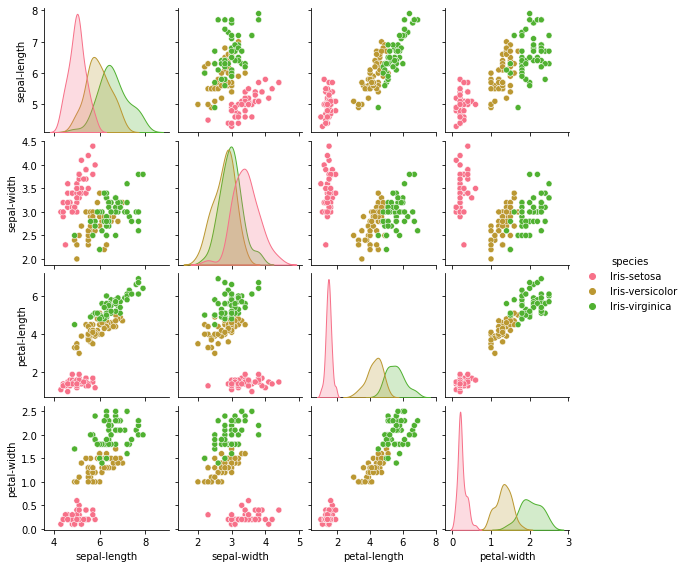

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_palette('husl')

def iris_data_pairplot():
  sns.pairplot(iris_data, hue='species', height = 2, diag_kind = "kde")
  plt.show()

iris_data_pairplot() 

We can see in this pairplot visualisation of the iris data set that Setosa species has significantly higher measurements when it comes to petal width & length, whereas in terms of sepal width the 3 species have a closer association. In terms of sepal width again Setosa iris have a higher reach but not as distinguishable as in the case of petal metrics.

### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [49]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from all columns
train, test = train_test_split(iris_data, test_size=0.30)
print(train)
train.describe()
#'train' is the name for the new separated dataframe for training

     sepal-length  sepal-width  petal-length  petal-width          species
43            5.0          3.5           1.6          0.6      Iris-setosa
6             4.6          3.4           1.4          0.3      Iris-setosa
121           5.6          2.8           4.9          2.0   Iris-virginica
44            5.1          3.8           1.9          0.4      Iris-setosa
119           6.0          2.2           5.0          1.5   Iris-virginica
..            ...          ...           ...          ...              ...
10            5.4          3.7           1.5          0.2      Iris-setosa
37            4.9          3.1           1.5          0.1      Iris-setosa
99            5.7          2.8           4.1          1.3  Iris-versicolor
123           6.3          2.7           4.9          1.8   Iris-virginica
33            5.5          4.2           1.4          0.2      Iris-setosa

[105 rows x 5 columns]


,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.754286,3.073333,3.611429,1.147619
std,0.792638,0.435949,1.767621,0.771374
min,4.300000,2.200000,1.100000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.100000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


We can see that after split code by a 70% portion and then running the .describe() code, the summary metrics have changed i.e. the count has dropped from 150 to 105. Therefore the 70% train split of the total for training is complete.

### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species. For now, the indicator is the mean.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.

In [57]:
#get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
#step1
def encode(df, **kdws):
  indicator = kdws['indicator']
  key = kdws['key']
  if df[key] > indicator:
    return 1
  else:
    return 0

#step2
#calculating the means of the metrics columns
sepal_length_m = train["sepal-length"].mean()
print("mean of sepal length: ", sepal_length_m)
sepal_width_m = train["sepal-width"].mean()
print("mean of sepal width: ", sepal_width_m)
petal_length_m = train["petal-length"].mean()
print("mean of petal length: ", petal_length_m)
petal_width_m = train["petal-width"].mean()
print("mean of petal with: ", petal_width_m)

#step3
#run the function for each column so that each of the four columns are encoded [0 = below mean, 1 = above mean], then drop the original columns, saving as a new dataframe
train_mean = train.copy() #creating a new copy of the original dtframe
train_mean['sepal-length'] = train_mean.apply(encode, axis=1, key='sepal-length', indicator=train['sepal-length'].mean())
train_mean['sepal-width'] = train_mean.apply(encode, axis=1, key='sepal-width', indicator=train['sepal-width'].mean())
train_mean['petal-length'] = train_mean.apply(encode, axis=1, key='petal-length', indicator=train['petal-length'].mean())
train_mean['petal-width'] = train_mean.apply(encode, axis=1, key='petal-width', indicator=train['petal-width'].mean())

#If we rename the column titles to 'sepal-length2' etc, that will create a copy of the dataframe with the new columns created via renaming. 
#The variant 'train_mean' is also a exact copy of the variant 'train'. 
# train_mean['sepal-length2'] = train.apply(encode, axis=1, key='sepal-length', indicator=train['sepal-length'].mean())
# train_mean['sepal-width2'] = train.apply(encode, axis=1, key='sepal-width', indicator=train['sepal-width'].mean())
# train_mean['petal-length2'] = train.apply(encode, axis=1, key='petal-length', indicator=train['petal-length'].mean())
# train_mean['petal-width2'] = train.apply(encode, axis=1, key='petal-width', indicator=train['petal-width'].mean())
#print(train_mean)
train_mean
#train_mean.describe()

mean of sepal length:  0.44761904761904764
mean of sepal width:  3.073333333333334
mean of petal length:  3.611428571428571
mean of petal with:  1.1476190476190475


,sepal-length,sepal-width,petal-length,petal-width,species
43,0,1,0,0,Iris-setosa
6,0,1,0,0,Iris-setosa
121,0,0,1,1,Iris-virginica
44,0,1,0,0,Iris-setosa
119,1,0,1,1,Iris-virginica
...,...,...,...,...,...
10,0,1,0,0,Iris-setosa
37,0,1,0,0,Iris-setosa
99,0,0,1,1,Iris-versicolor
123,1,0,1,1,Iris-virginica


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the median that are NOT Iris-virginica.  Calculate these in the same way



In [ ]:
# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica
#train2 = train_mean["species"].count()  ##Need to focus on Iris-virginica only not the whole column
#print("Species count: ", train2)
Virginica = train_mean.loc[(train_mean["species"] == "Iris-virginica")]["species"].count()
print(Virginica)

virginica_sl = train_mean.loc[(train_mean["species"] == "Iris-virginica") & (train_mean['sepal-length2'] == 1)]

virginica2 = virginica_sl["species"].count()
print("Iris-virginica sepal length count: ", virginica2)

proportion_of_virginica = (virginica2/Virginica)
print("Per cent proportion = ", proportion_of_virginica)

34
Iris-virginica sepal length count:  32
Per cent proportion =  0.9411764705882353


In [ ]:
virginica_sw = train_mean.loc[(train_mean["species"] == "Iris-virginica") & (train_mean['sepal-width2'] == 1)]

virginica3 = virginica_sw["species"].count()
print("Iris-virginica sepal width count: ", virginica3)

proportion_of_virginica = (virginica3/Virginica)
print("Per cent proportion = ", proportion_of_virginica)

Iris-virginica sepal width count:  10
Per cent proportion =  0.29411764705882354


In [ ]:
virginica_pl = train_mean.loc[(train_mean["species"] == "Iris-virginica") & (train_mean['petal-length2'] == 1)]

virginica4 = virginica_pl["species"].count()
print("Iris-virginica petal length count: ", virginica4)

proportion_of_virginica = (virginica4/Virginica)
print("Per cent proportion = ", proportion_of_virginica)

Iris-virginica petal length count:  34
Per cent proportion =  1.0


In [ ]:
virginica_pw = train_mean.loc[(train_mean["species"] == "Iris-virginica") & (train_mean['petal-width2'] == 1)]

virginica5 = virginica_pw["species"].count()
print("Iris-virginica petal length count: ", virginica5)

proportion_of_virginica = (virginica5/Virginica)
print("Per cent proportion = ", proportion_of_virginica)

Iris-virginica petal length count:  34
Per cent proportion =  1.0


### Exercise 5 - Calculate the proportion of each column where the value is below median that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the meam (#ES-correcting to median)

In [ ]:
# calculate the proportion of results where the value is below median that are of the species Iris-virginica
#means - could have done this as step 2 and then equate indicator with 'sepal_length_m' etc. for the enoding step above.
sepal_length_med = train["sepal-length"].median()
print("mean of sepal length: ", sepal_length_med)


mean of sepal length:  5.8


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [ ]:
# show which columns are reliable predictors



### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




In [ ]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0:
        return None
        if df['petal-length'] == 0:
            return None
            if df['sepal-length'] == 0:
                return None
    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.35555555555555557


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


What do you notice? (write your answer here)

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


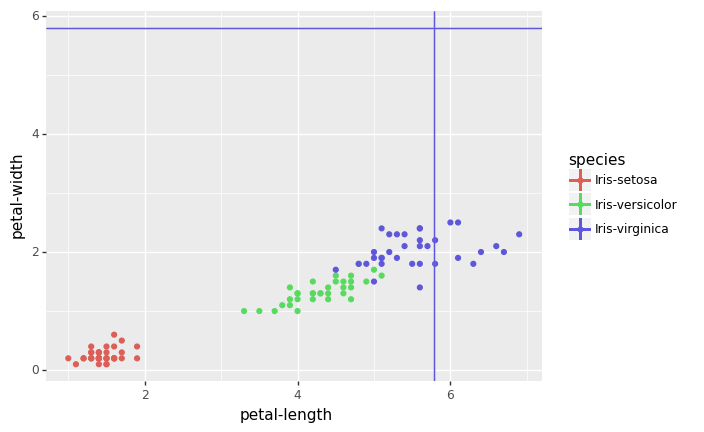

<ggplot: (8757821358277)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))